<a href="https://colab.research.google.com/github/krzysztof-siedlecki/House_data/blob/main/Housing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Loading csv to google colab
from google.colab import files
files.upload()
import io

Saving housing_data.csv to housing_data.csv


In [3]:
#Reading housing csv
import pandas as pd

df = pd.read_csv('housing_data.csv')
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [4]:
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
numerical_features = ['SalePrice', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', '1stFlrSF','2ndFlrSF', 'BedroomAbvGr']

categorical_features = ['MSZoning','LotShape', 'Neighborhood', 'CentralAir', 'SaleCondition', 'MoSold', 'YrSold']

df = df[numerical_features + categorical_features]
print(df)

      SalePrice  LotArea  OverallQual  OverallCond  YearBuilt  1stFlrSF  \
0        208500     8450            7            5       2003       856   
1        181500     9600            6            8       1976      1262   
2        223500    11250            7            5       2001       920   
3        140000     9550            7            5       1915       961   
4        250000    14260            8            5       2000      1145   
...         ...      ...          ...          ...        ...       ...   
1455     175000     7917            6            5       1999       953   
1456     210000    13175            6            6       1978      2073   
1457     266500     9042            7            9       1941      1188   
1458     142125     9717            5            6       1950      1078   
1459     147500     9937            5            6       1965      1256   

      2ndFlrSF  BedroomAbvGr MSZoning LotShape Neighborhood CentralAir  \
0          854           

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SalePrice      1460 non-null   int64 
 1   LotArea        1460 non-null   int64 
 2   OverallQual    1460 non-null   int64 
 3   OverallCond    1460 non-null   int64 
 4   YearBuilt      1460 non-null   int64 
 5   1stFlrSF       1460 non-null   int64 
 6   2ndFlrSF       1460 non-null   int64 
 7   BedroomAbvGr   1460 non-null   int64 
 8   MSZoning       1460 non-null   object
 9   LotShape       1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  CentralAir     1460 non-null   object
 12  SaleCondition  1460 non-null   object
 13  MoSold         1460 non-null   int64 
 14  YrSold         1460 non-null   int64 
dtypes: int64(10), object(5)
memory usage: 171.2+ KB
None


In [8]:
#SalePrice is our goal
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: >

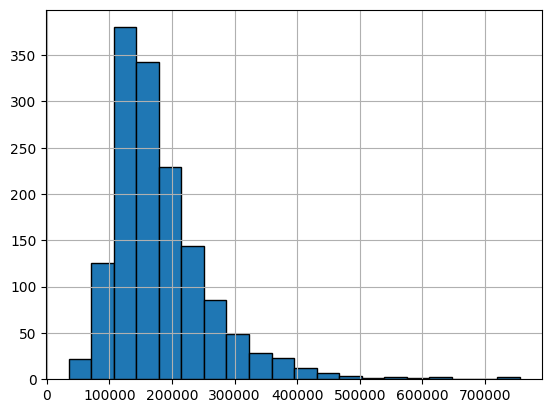

In [10]:
df['SalePrice'].hist(edgecolor='black',bins=20)

In [12]:
#Taking care of numerical features
df[numerical_features].describe()

,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,BedroomAbvGr
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,10516.828082,6.099315,5.575342,1971.267808,1162.626712,346.992466,2.866438
std,79442.502883,9981.264932,1.382997,1.112799,30.202904,386.587738,436.528436,0.815778
min,34900.000000,1300.000000,1.000000,1.000000,1872.000000,334.000000,0.000000,0.000000
25%,129975.000000,7553.500000,5.000000,5.000000,1954.000000,882.000000,0.000000,2.000000
50%,163000.000000,9478.500000,6.000000,5.000000,1973.000000,1087.000000,0.000000,3.000000
75%,214000.000000,11601.500000,7.000000,6.000000,2000.000000,1391.250000,728.000000,3.000000
max,755000.000000,215245.000000,10.000000,9.000000,2010.000000,4692.000000,2065.000000,8.000000


array([[<Axes: title={'center': 'SalePrice'}>,
        <Axes: title={'center': 'LotArea'}>],
       [<Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': '1stFlrSF'}>],
       [<Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>]], dtype=object)

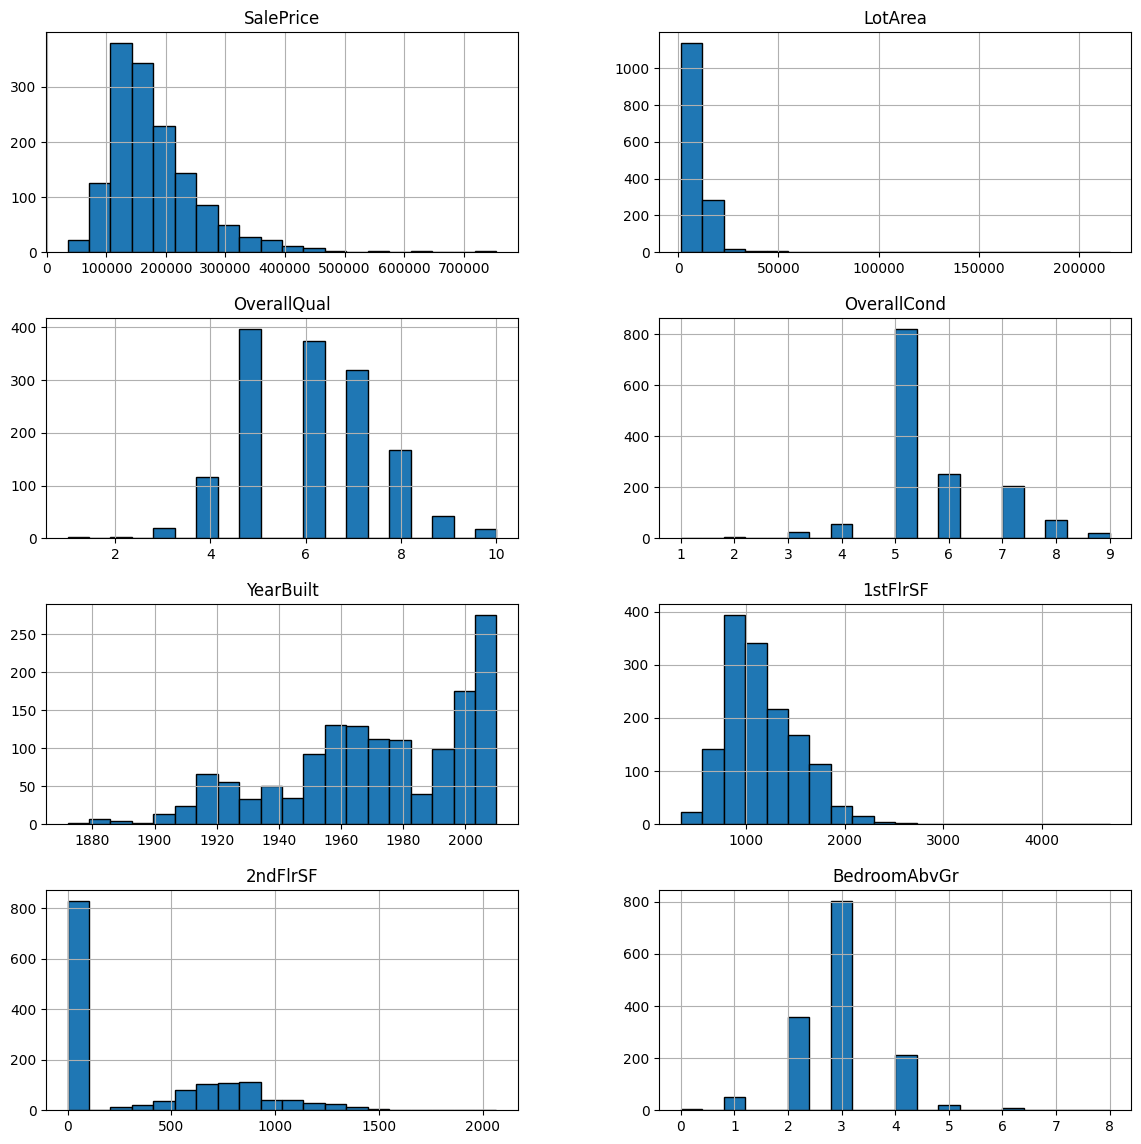

In [17]:
df[numerical_features].hist(edgecolor='black', bins=20, figsize=(14,14), layout=(4,2))

<Axes: >

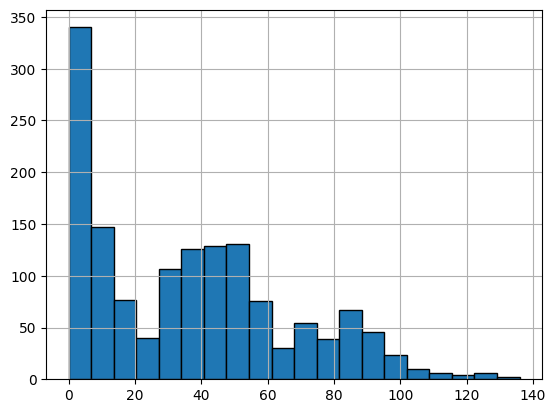

In [18]:
#Making new column by substracting YrSold from YeatBuild
df['AgeWhenSold'] = df['YrSold']-df['YearBuilt']

numerical_features.append('AgeWhenSold')

df['AgeWhenSold'].hist(edgecolor='black', bins=20)

<Axes: title={'center': 'MSZoning'}>

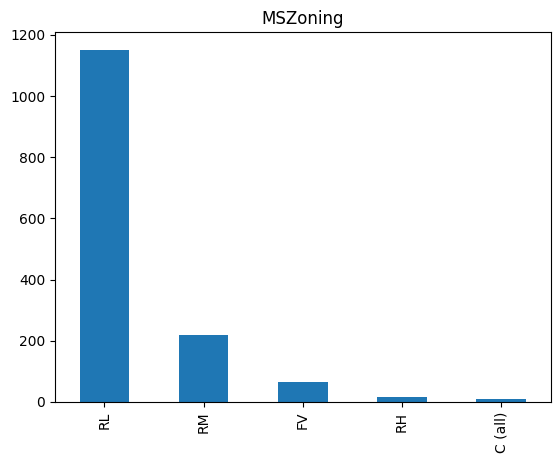

In [20]:
#Taking care of categorical features
df['MSZoning'].value_counts().plot(kind='bar', title='MSZoning')

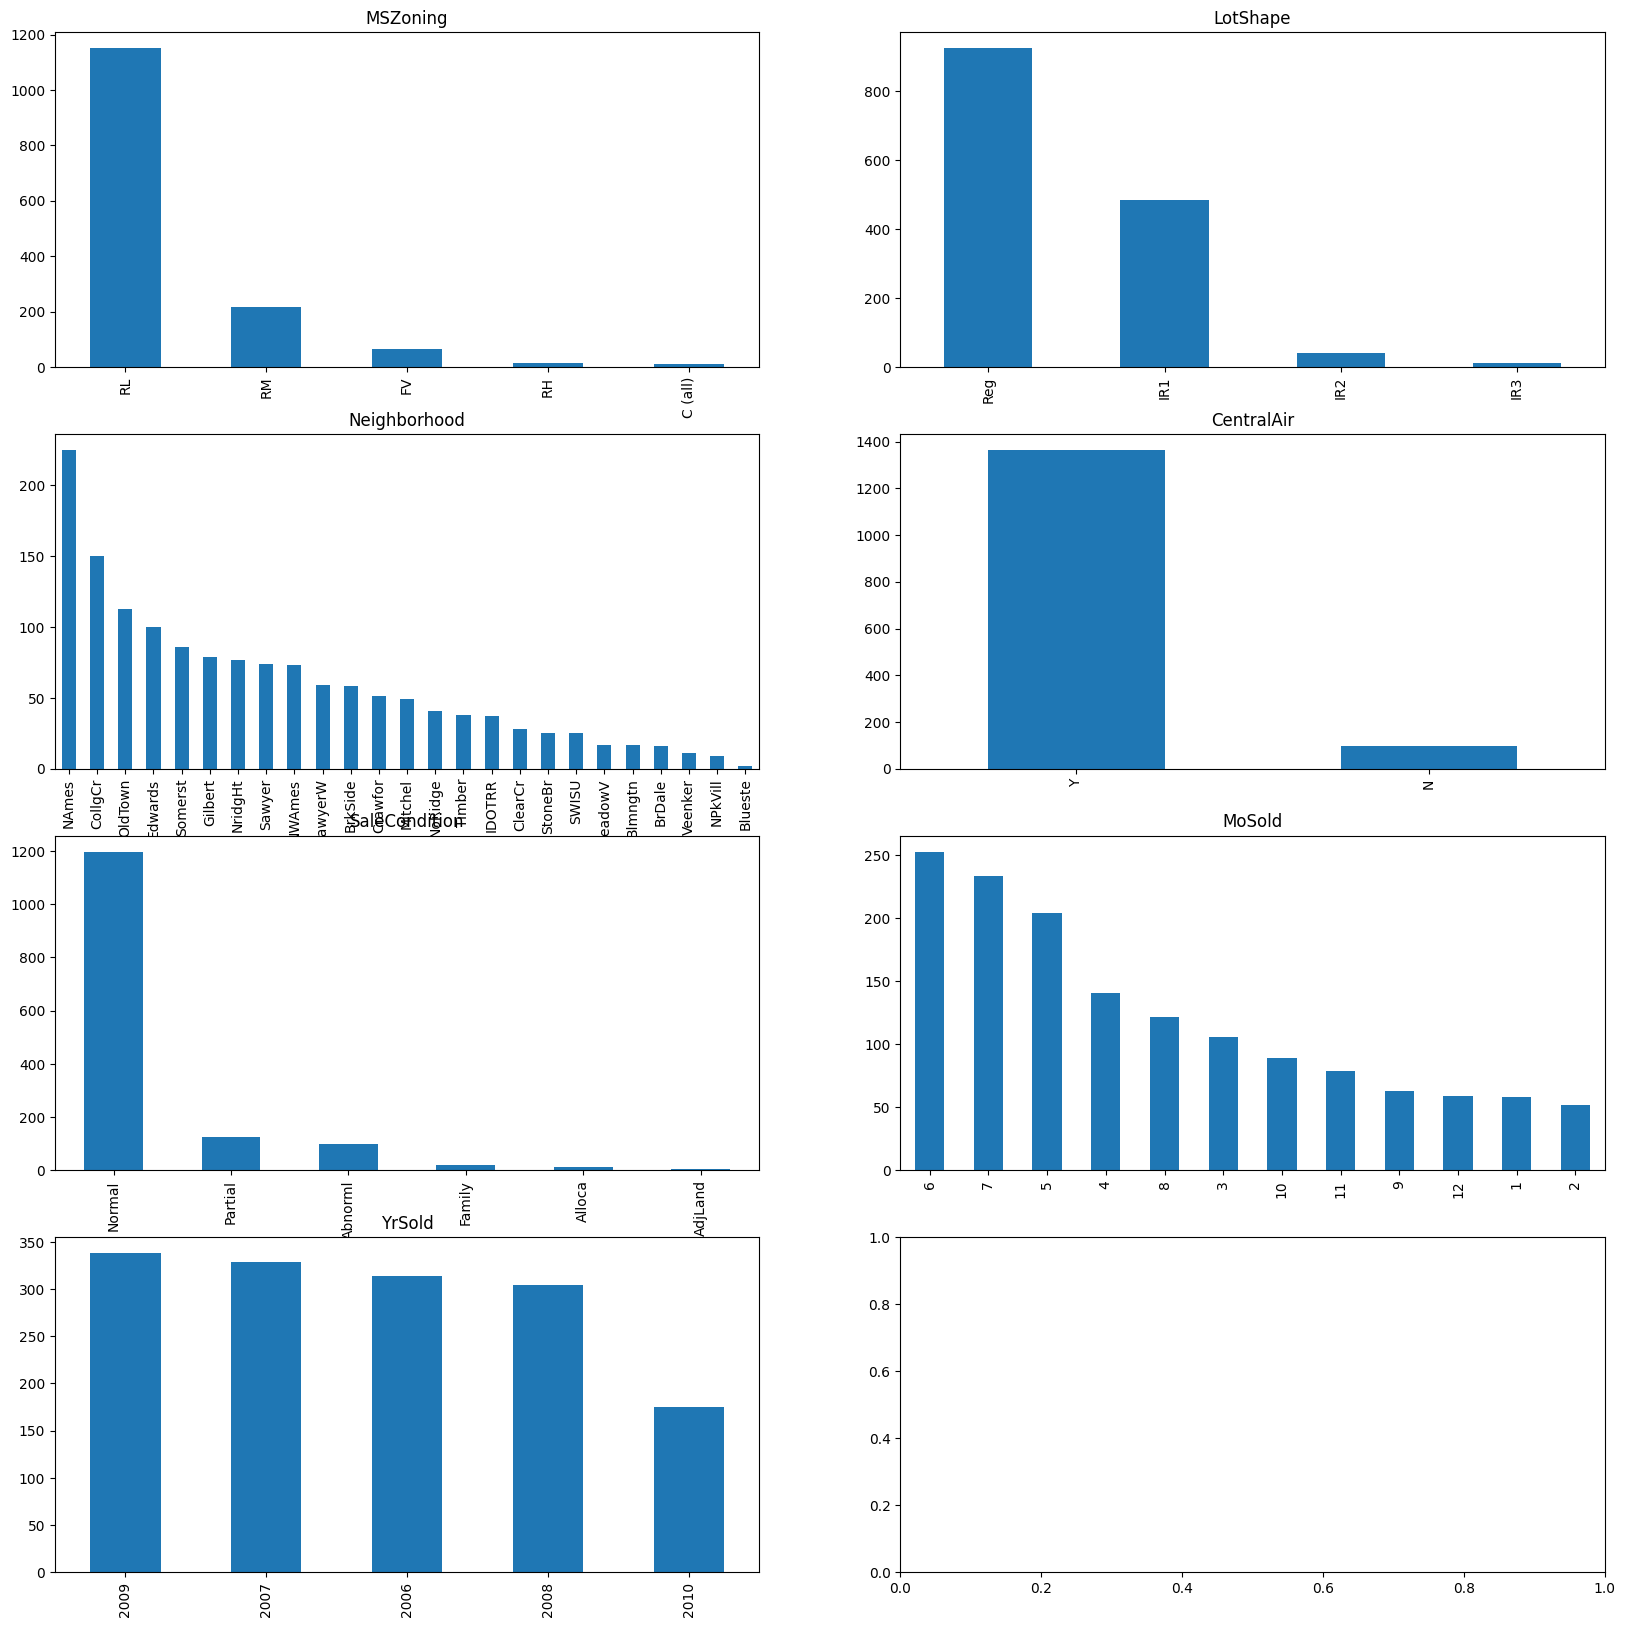

In [23]:
#Making loop to plot a plot for each of categorical feature
import matplotlib.pyplot as plt

figure, axis = plt.subplots(4, 2,
                            figsize=(20,20))

for feature, subplot in zip(categorical_features, axis.flatten()):
  df[feature].value_counts().plot(kind='bar',
                                  ax=subplot,
                                  title=feature)

In [27]:
#Cleaning features if there are not a lot of them
def identify_above30(series):
  counts = series.value_counts()

  return list(counts[counts >= 30].index)

categories_to_keep = df[categorical_features].apply(identify_above30,
                               axis = 0)

for feature in categorical_features:

  df = df.loc[df[feature].isin(categories_to_keep[feature])]

df.shape

(1218, 16)

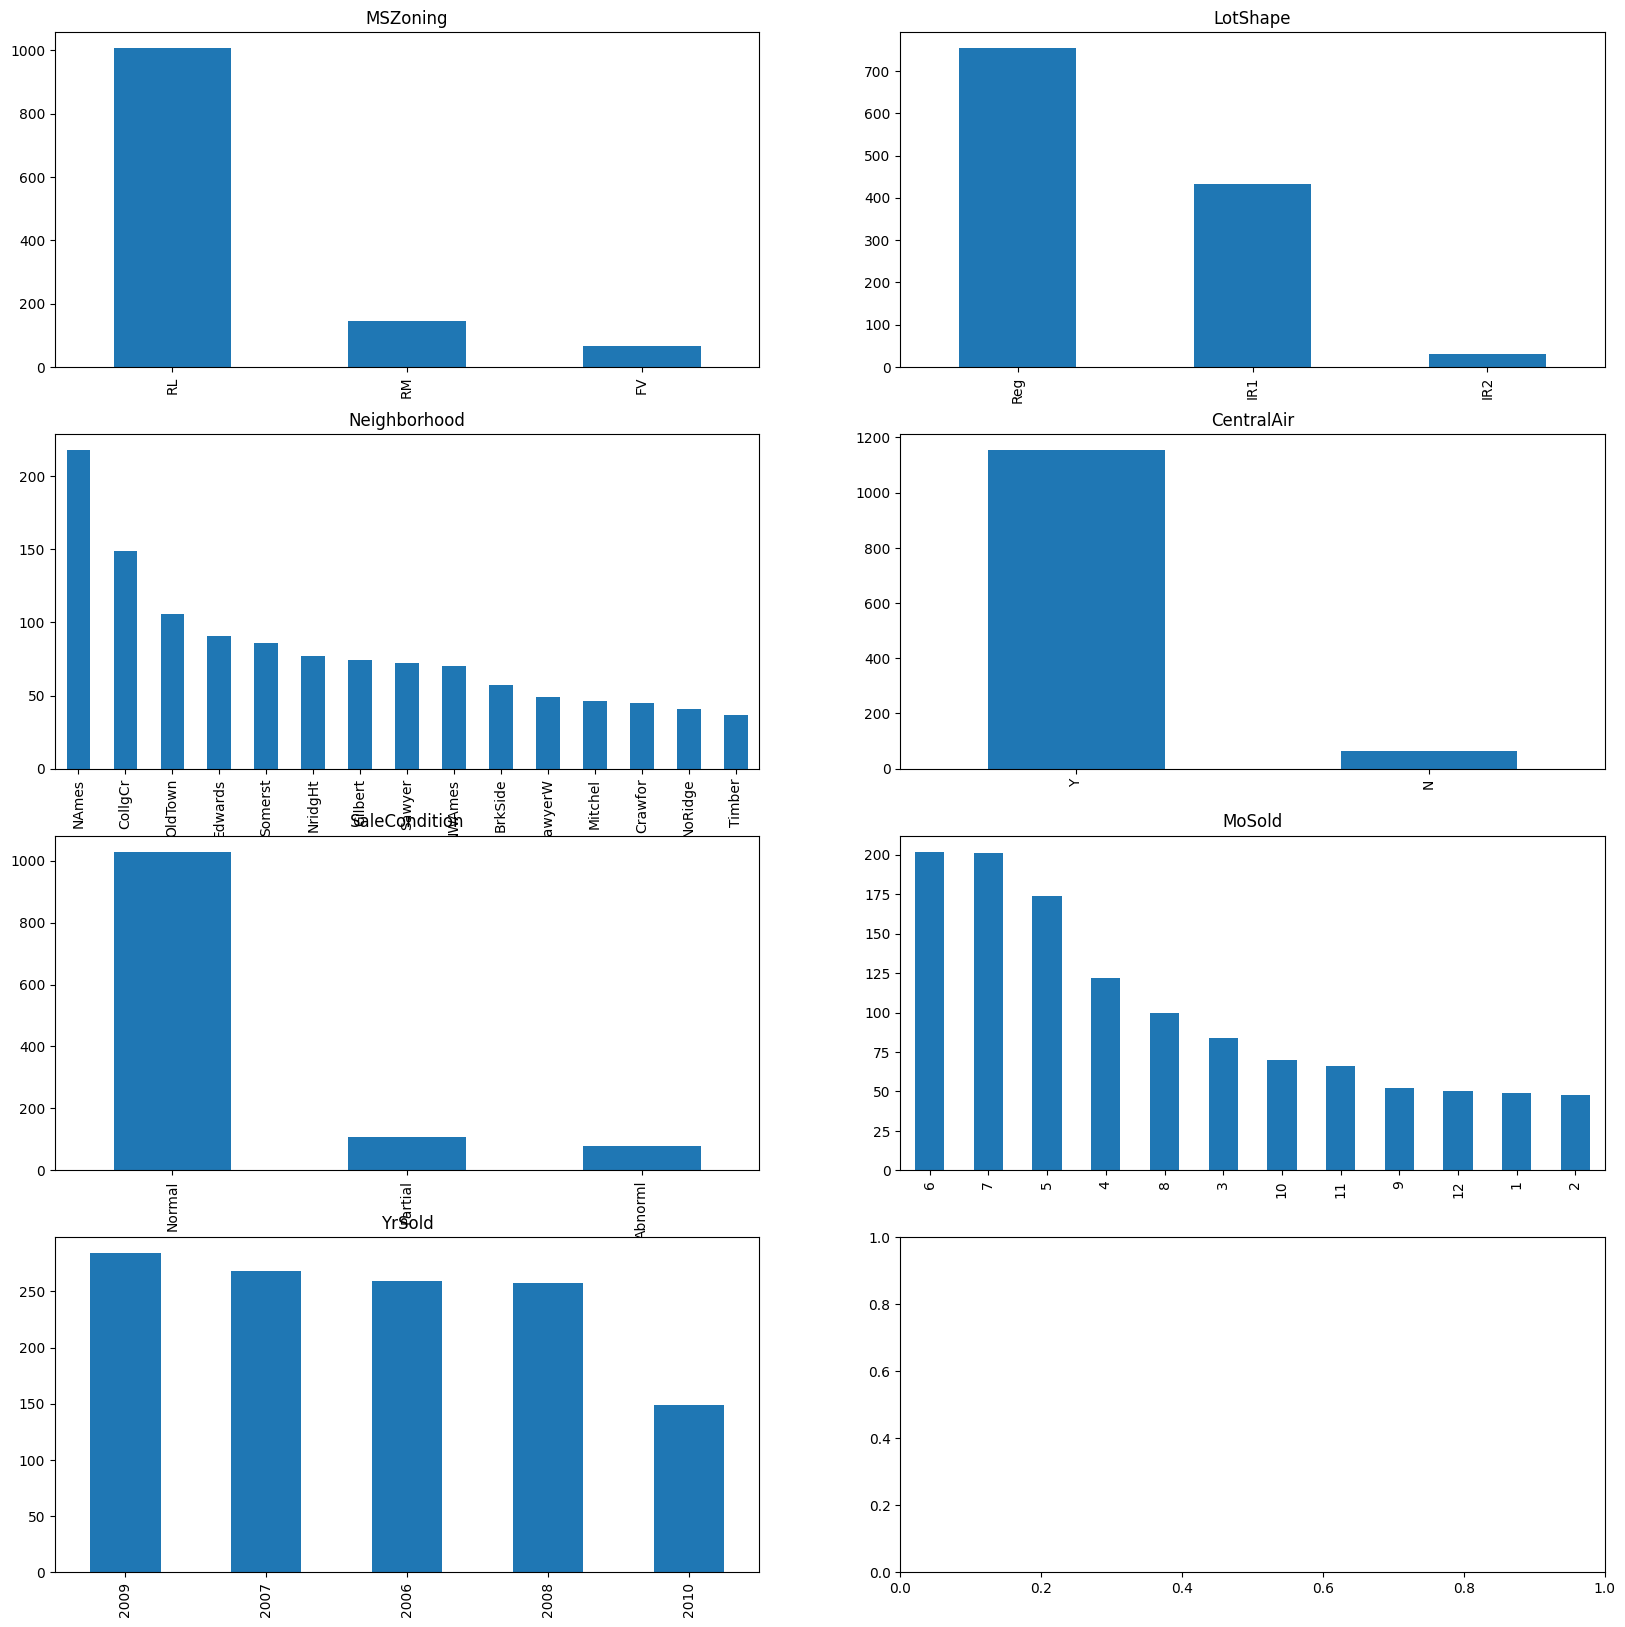

In [28]:
#Making plots for cleaned features
figure, axis = plt.subplots(4, 2,
                            figsize=(20,20))

for feature, subplot in zip(categorical_features, axis.flatten()):
  df[feature].value_counts().plot(kind='bar',
                                  ax=subplot,
                                  title=feature)

<Axes: xlabel='LotArea', ylabel='SalePrice'>

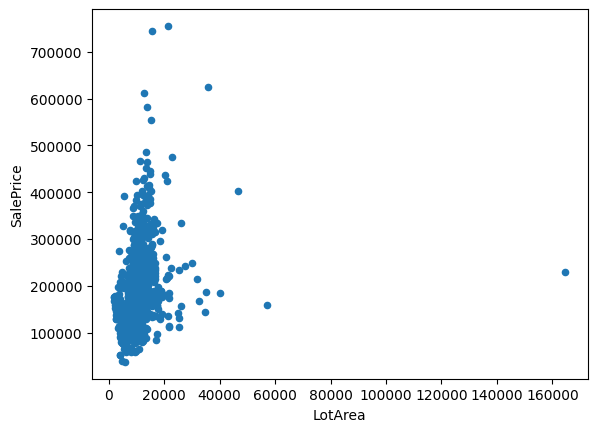

In [30]:
df.plot.scatter(x='LotArea',
                y='SalePrice')

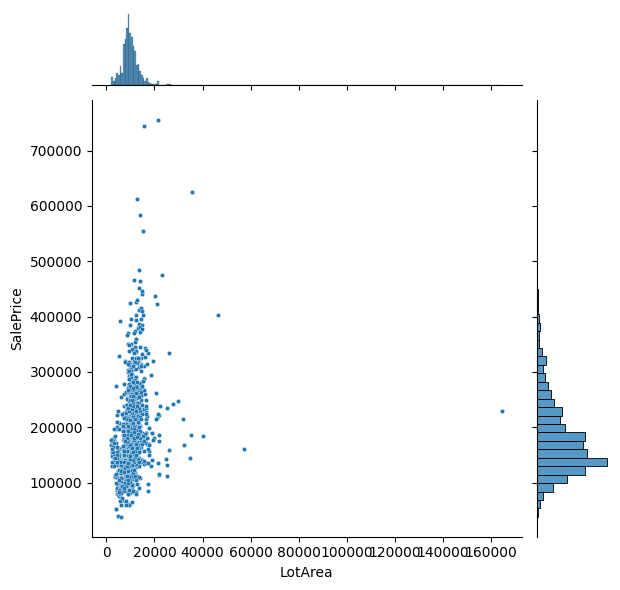

In [34]:
import seaborn as sns

sns.jointplot(x='LotArea',
             y='SalePrice',
             data=df,
              joint_kws={'s':10})

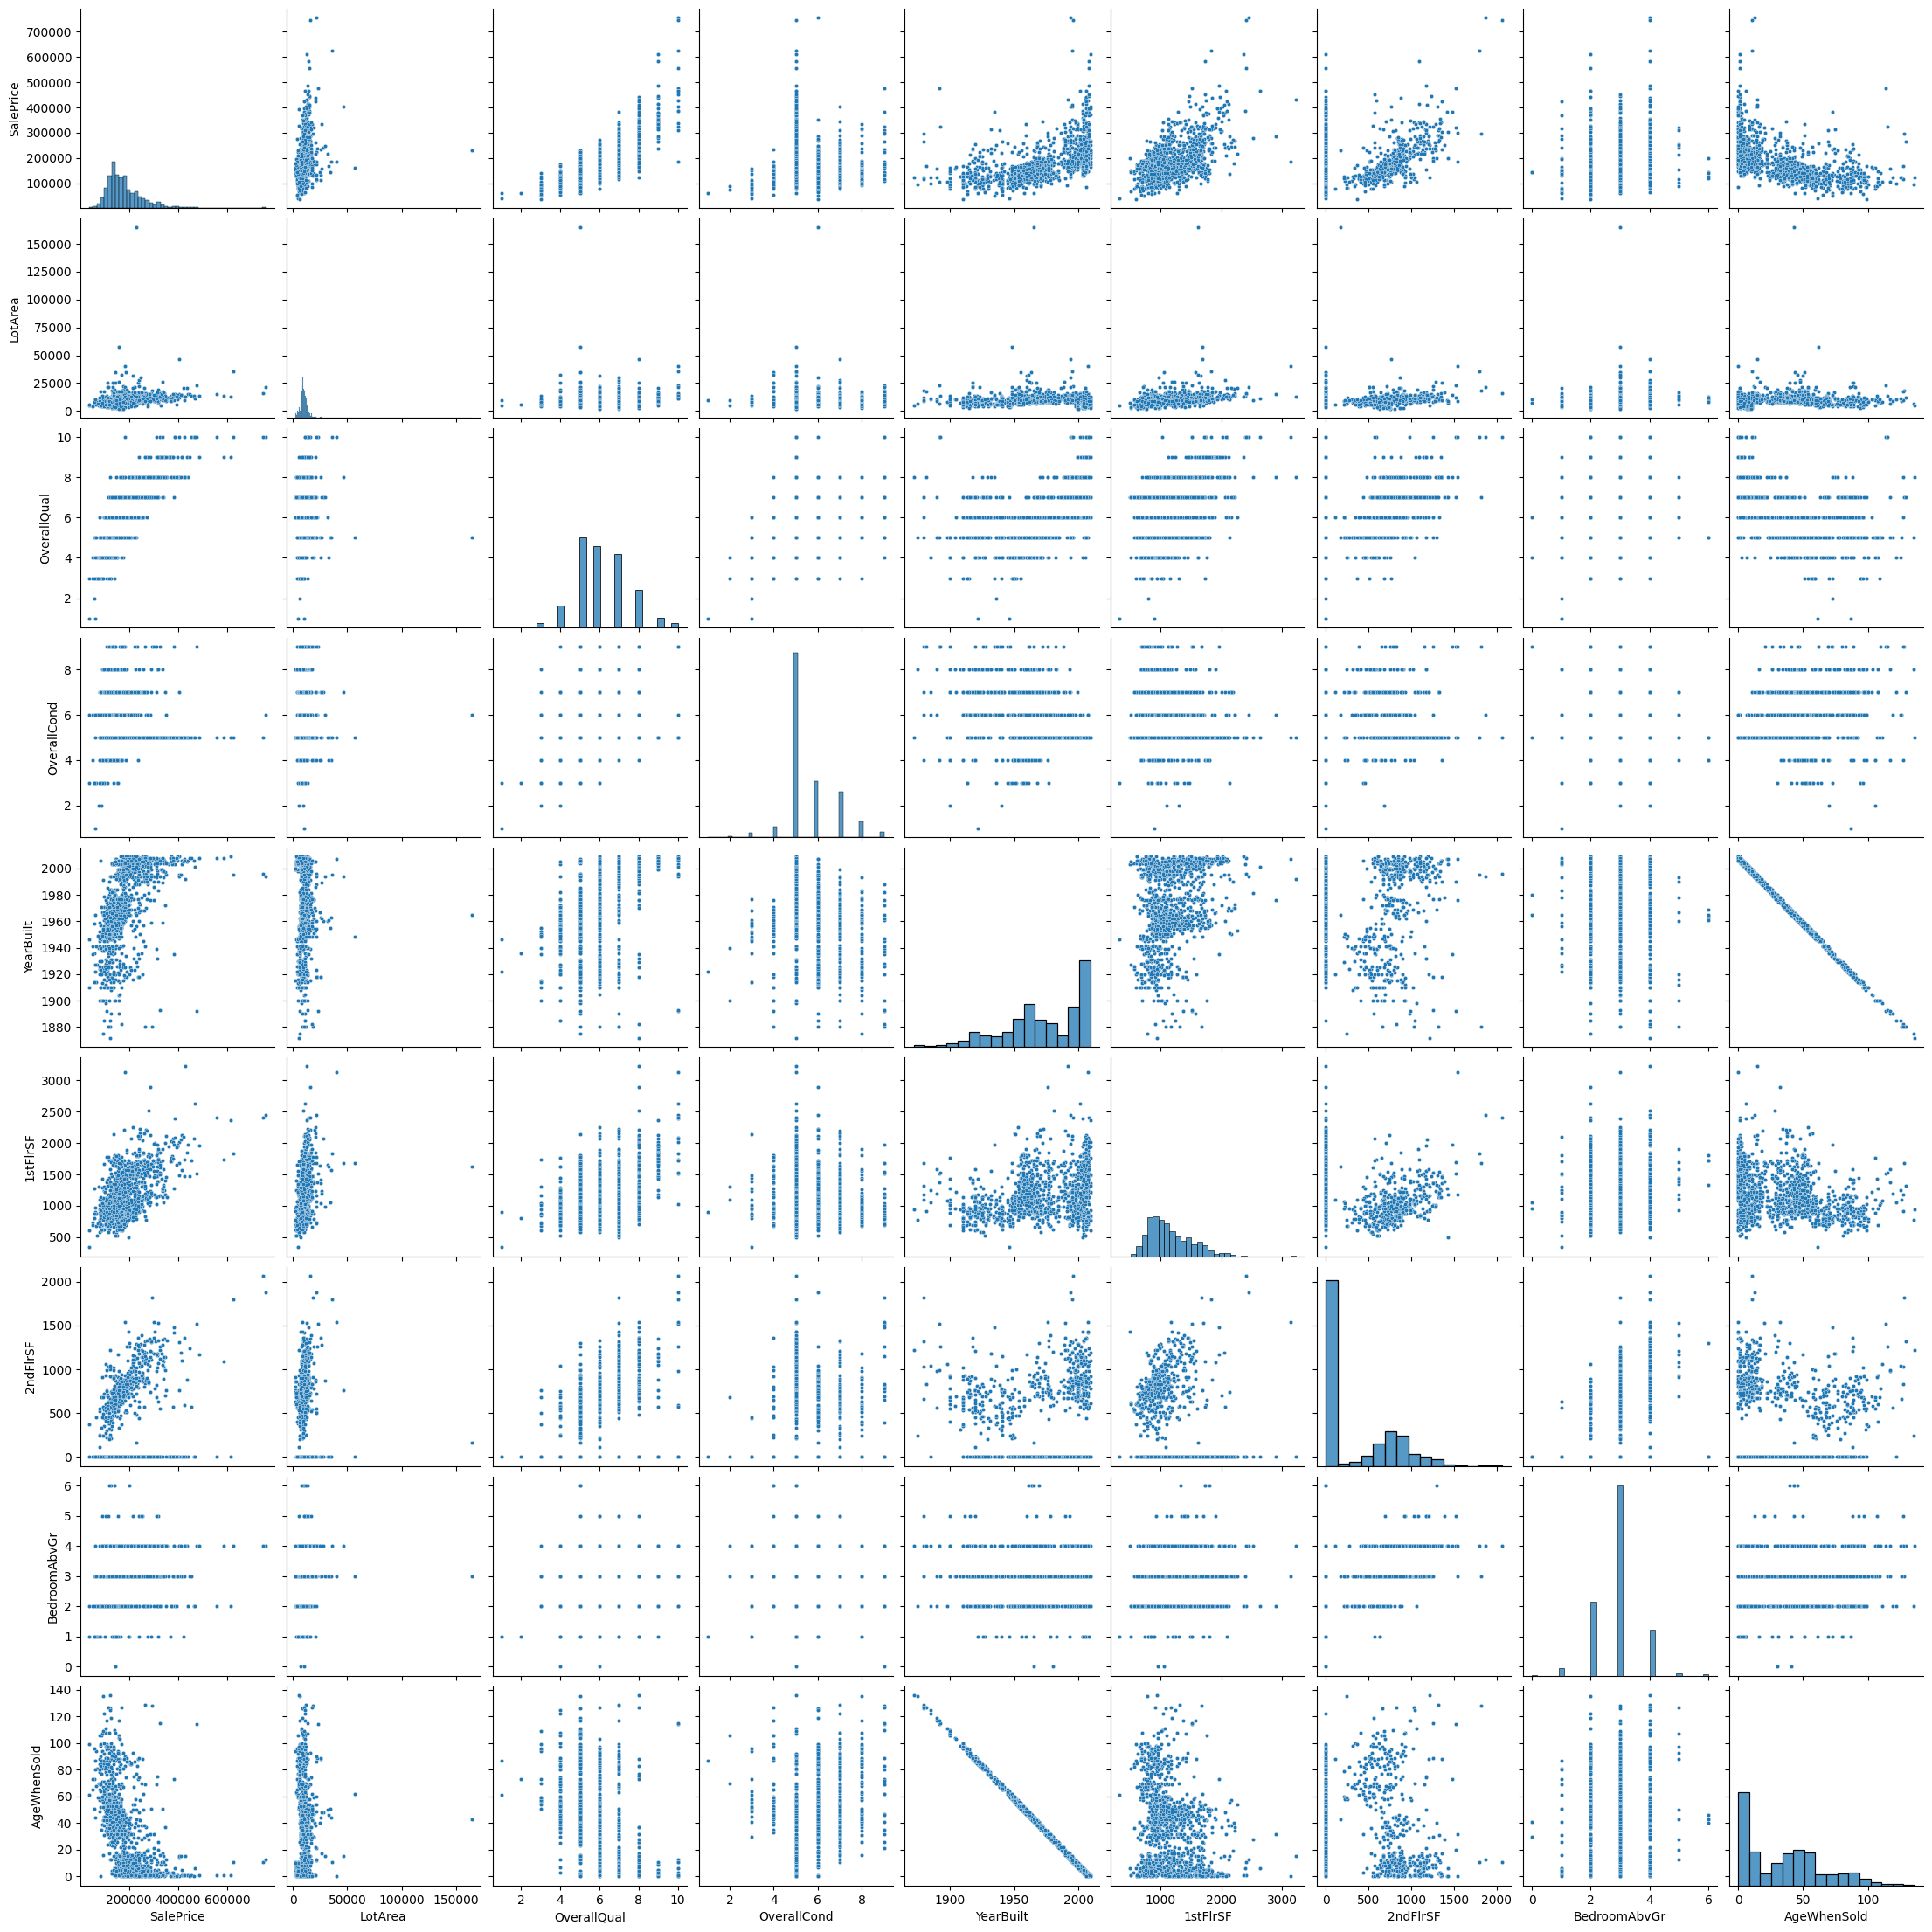

In [37]:
sns.pairplot(df[numerical_features],
             plot_kws={'s':10})

In [38]:
df[numerical_features].corr()

,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,BedroomAbvGr,AgeWhenSold
SalePrice,1.000000,0.257231,0.803245,-0.101917,0.519181,0.605532,0.356182,0.213151,-0.519183
LotArea,0.257231,1.000000,0.113239,-0.018303,0.024526,0.312906,0.069757,0.186816,-0.024954
OverallQual,0.803245,0.113239,1.000000,-0.113654,0.565179,0.454466,0.347414,0.157272,-0.565457
OverallCond,-0.101917,-0.018303,-0.113654,1.000000,-0.426981,-0.150960,0.006680,-0.020275,0.428519
YearBuilt,0.519181,0.024526,0.565179,-0.426981,1.000000,0.259726,0.048820,-0.013404,-0.999023
1stFlrSF,0.605532,0.312906,0.454466,-0.150960,0.259726,1.000000,-0.215834,0.154171,-0.259183
2ndFlrSF,0.356182,0.069757,0.347414,0.006680,0.048820,-0.215834,1.000000,0.483379,-0.050178
BedroomAbvGr,0.213151,0.186816,0.157272,-0.020275,-0.013404,0.154171,0.483379,1.000000,0.012926
AgeWhenSold,-0.519183,-0.024954,-0.565457,0.428519,-0.999023,-0.259183,-0.050178,0.012926,1.000000


In [42]:
df[numerical_features].corr()['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.803245
1stFlrSF        0.605532
YearBuilt       0.519181
2ndFlrSF        0.356182
LotArea         0.257231
BedroomAbvGr    0.213151
OverallCond    -0.101917
AgeWhenSold    -0.519183
Name: SalePrice, dtype: float64

<Axes: >

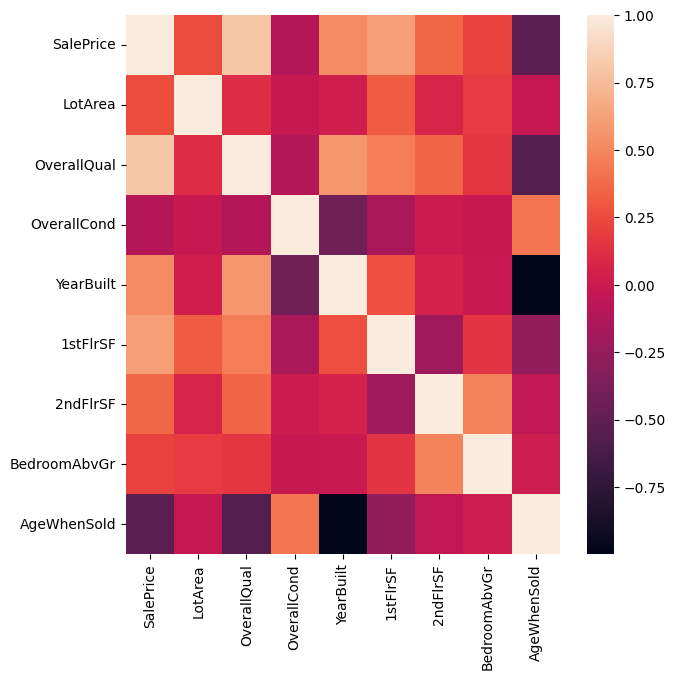

In [46]:
correlations = df[numerical_features].corr()

figure, axis = plt.subplots(figsize= (7,7))

sns.heatmap(correlations,
            ax = axis)